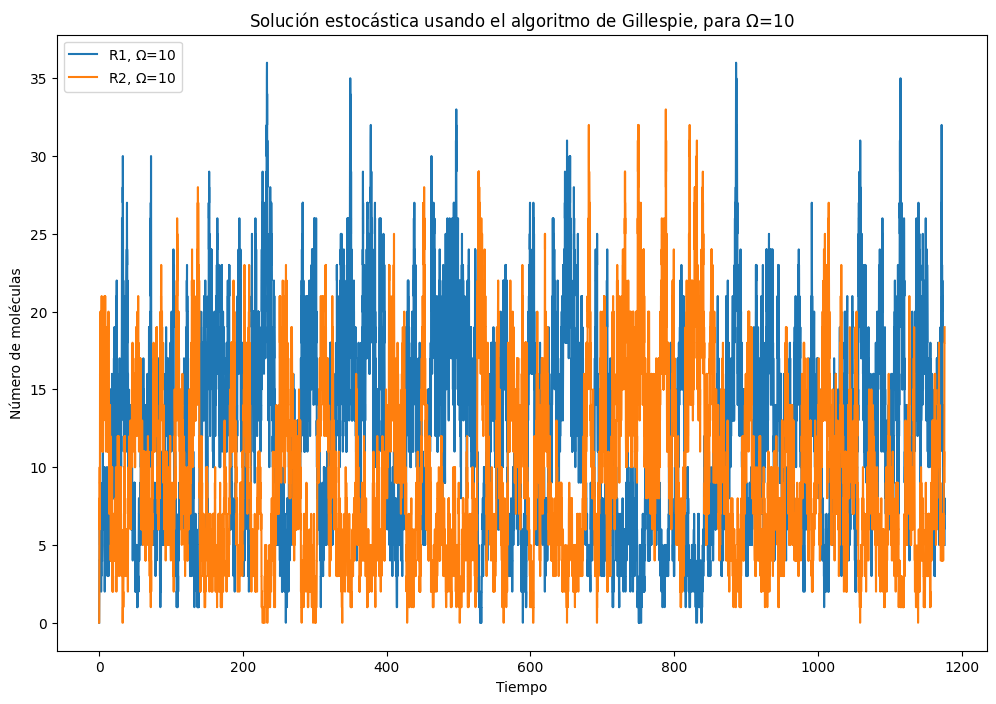

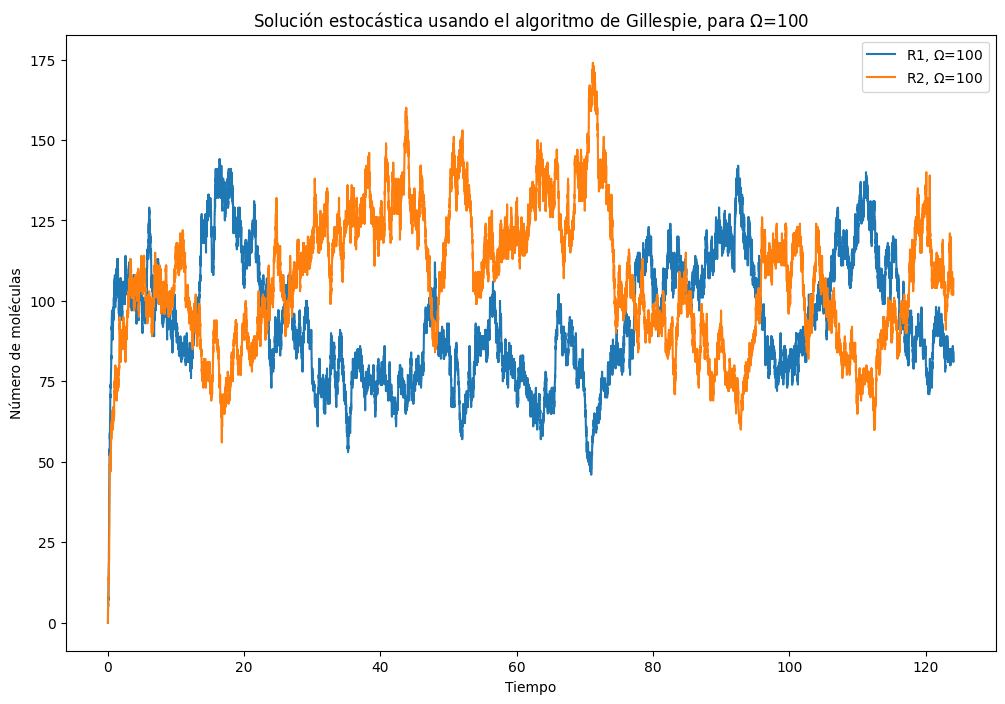

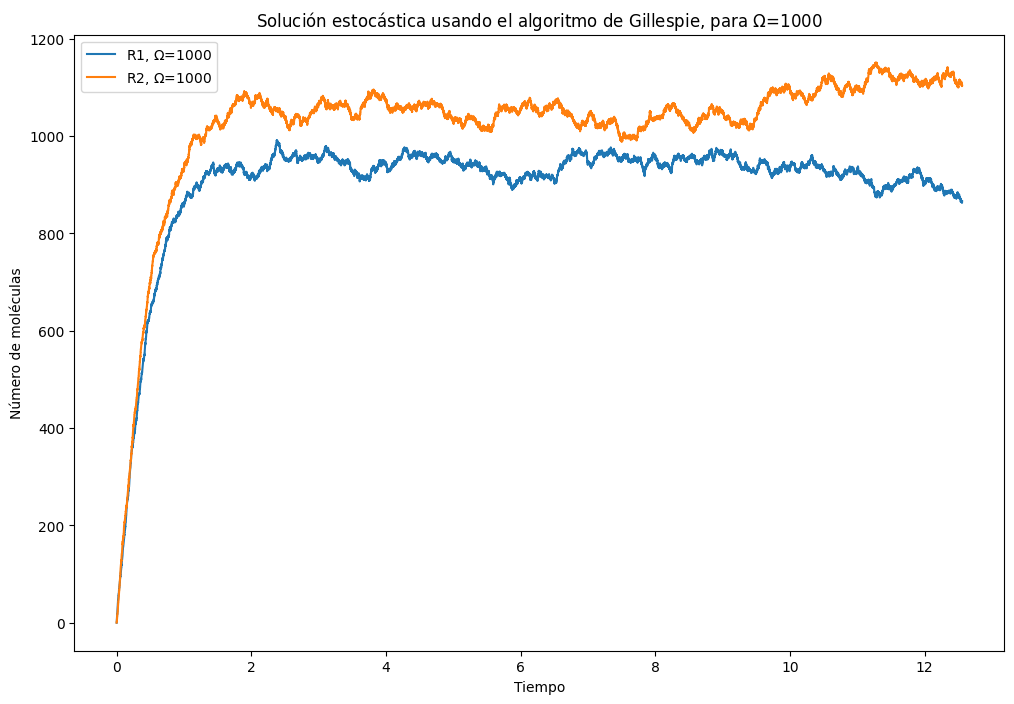

In [3]:
import numpy as np
import math
import random as rnd
import matplotlib.pyplot as plt

# Condiciones iniciales y parametros
t0 = 0.0
R1 = 0.0
R2 = 0.0

alpha = 2.0
beta = 1.0
K_R = 1.0
n = 2.0

Omegas = [10, 100, 1000]
Steps = 50000

# Se define la Matriz estoquiometrica
S = [[1., 0., -1., 0.], [0., 1., 0., -1.]]

# Se define la funcion gR(x) con la forma de Hill
def g_R(x):
    return 1 / (1 + (x / K_R)**n)

# Funciónn que genera numero aleatorio de distribucion exponencial
def dist_exp(a):
    r = rnd.random()
    return -(1./a) * math.log(r)

# Elige aleatoriamente la reaccion definida en el vector de propensiones ni y una tasa de reaccion global A
def dist_reaction(ni, A):
    r = rnd.random()
    if r < ni[0]/A:
        return 0
    elif r < (ni[0] + ni[1])/A:
        return 1
    elif r < (ni[0] + ni[1] + ni[2])/A:
        return 2
    elif r <= (ni[0] + ni[1] + ni[2] + ni[3])/A:
        return 3

# Ciclo del algoritmo
for omega in Omegas:
    # Se inicializa los vectores solucion y el tiempo
    Y = np.zeros([2, Steps+1])
    t = np.zeros(Steps+1)
    
    # Se inicializan las condiciones iniciales
    Y[0][0] = R1 
    Y[1][0] = R2
    
    for i in range(Steps):
        ni = np.array([omega*alpha*g_R((Y[1][i])/(omega)), omega*alpha*g_R((Y[0][i])/(omega)),
                       beta*Y[0][i], beta*Y[1][i]])
        a = sum(ni)
        tau = dist_exp(a)
        mu = dist_reaction(ni, a)
        Y[0][i+1] = Y[0][i] + S[0][mu]
        Y[1][i+1] = Y[1][i] + S[1][mu]
        t[i+1] = t[i] + tau
    
    plt.figure(figsize=(12, 8))
    plt.plot(t, Y[0], label=f'R1, $\Omega$={omega}')
    plt.plot(t, Y[1], label=f'R2, $\Omega$={omega}')
    plt.xlabel('Tiempo')
    plt.ylabel('Número de moléculas')
    plt.title(f'Solución estocástica usando el algoritmo de Gillespie, para $\Omega$={omega}')
    plt.legend()
    plt.show()
